Natural Language Tool Kit for communicate with computer.

In [ ]:
!pip install nltk

Seaborn for visualization.

In [ ]:
!pip install seaborn

Import Liberaries

In [ ]:
import re #regular expressions(for pattern recognization (ex. email pattern @/+w/domain.com))
import nltk #for text (natural language tool kit)
import string
import warnings #to ignore deprecation warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #(for plotting a graph)
%matplotlib inline

Import the dataset

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1Eto1nsTtA1J0fhp7_ajWEV8-JG4smAbh'})
downloaded.GetContentFile('testdata.csv')

In [ ]:
#STEP-4: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1xGtQ4sN1LxeaaUEZcu8iYijWhJcfbDQk'})
downloaded.GetContentFile('traindata.csv')

### ***Read the dataset***

In [ ]:
train = pd.read_csv('traindata.csv')
test = pd.read_csv('testdata.csv')

Divide the data in 2 categories:
0-negative tweets, 1- positive tweets.

Train data who categories in 0. - Non racist

In [ ]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Data who categories in 1 - Positive

In [ ]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [ ]:
train.shape

(31962, 3)

In [ ]:
test.shape

(17197, 2)

In Train and test dataset there is 29720 values is neagtive and  2242 is positive sentence.

In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Measure the lenth and compare train and test dataset with the help of Graph.

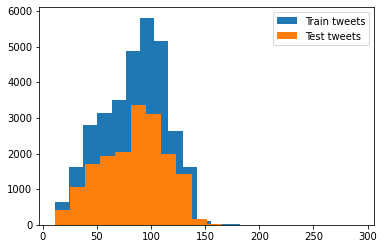

In [ ]:
length_train_dataset = train['tweet'].str.len()
length_test_dataset = test['tweet'].str.len()
plt.hist(length_train_dataset, bins=20,label="Train tweets")
plt.hist(length_test_dataset, bins=20,label="Test tweets")
plt.legend()
plt.show()

Combine the train and test dataset for further analysis.
and rename it with combinedataset

In [ ]:
combine=train.append(test,ignore_index=True)
combine.shape

(49159, 3)

### ***Preprocessing Dataset***

Clean the data

In [ ]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

Remove the unnecessary data with @word

In [ ]:
#removing twitter handles
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*")
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Remove special character, number, punctuation

In [ ]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


removing words whose length is less than 3

In [ ]:
#removing short words like helping verbs.
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
combine.head()


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


Consider each word as a token

In [ ]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Change all types of word in single string word

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [ ]:
#now let's combine these tokens(word) back in the sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet

Analysis the frequent word used

<function matplotlib.pyplot.show>

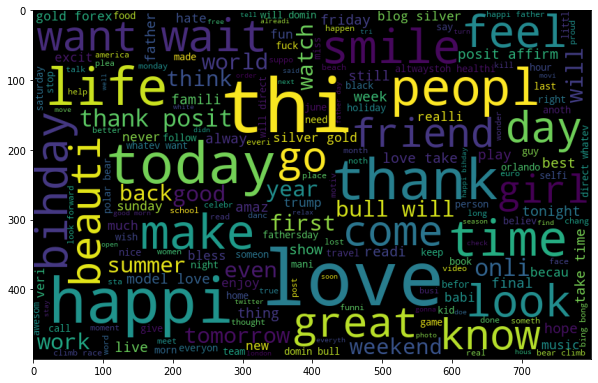

In [ ]:
all_words = ' '.join([text for text in combine['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show


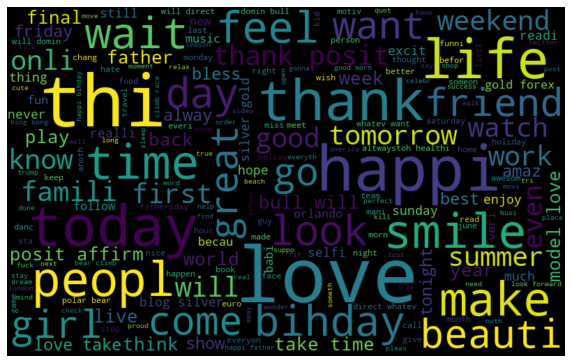

In [ ]:
#you can see that most words are positive or neutral in above wordcloud.
#now we will plot separate wordclouds for both racist and non-racis/sexist in our data.
###Separate cloud

normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

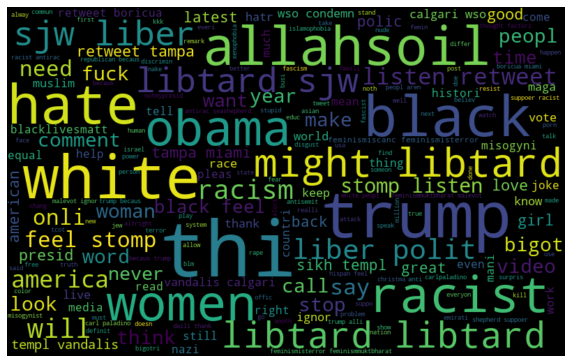

In [ ]:
#racist tweet

negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#collect hashtags on tweet sentiment

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [ ]:
#extracting hashtags from non racist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

Check the highest used word

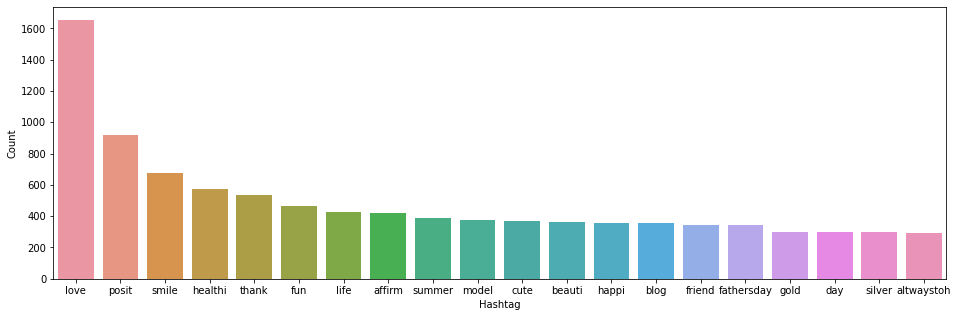

In [ ]:
#non-racist tweets

nonracist_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})
#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

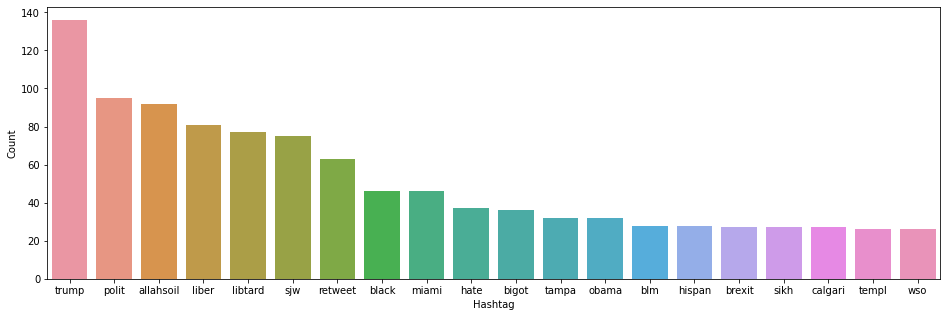

In [ ]:
#racist tweets

racist_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count")
plt.show()


In [ ]:
#Now we will apply assorted techniques like bag of words for converting data into featur

### ***Input split***

Feature extraction

In [ ]:
from sklearn.feature_extraction.text import  CountVectorizer
import gensim

In [ ]:
#Bag-of-words (measurement of word)
bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(49159, 1000)

Split the train and test dataset

In [ ]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=69)


In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (39327, 1000)
X_test_shape :  (9832, 1000)
y_train_shape :  (39327,)
y_test_shape :  (9832,)


### Modelling

 Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)


Import confusion matrix

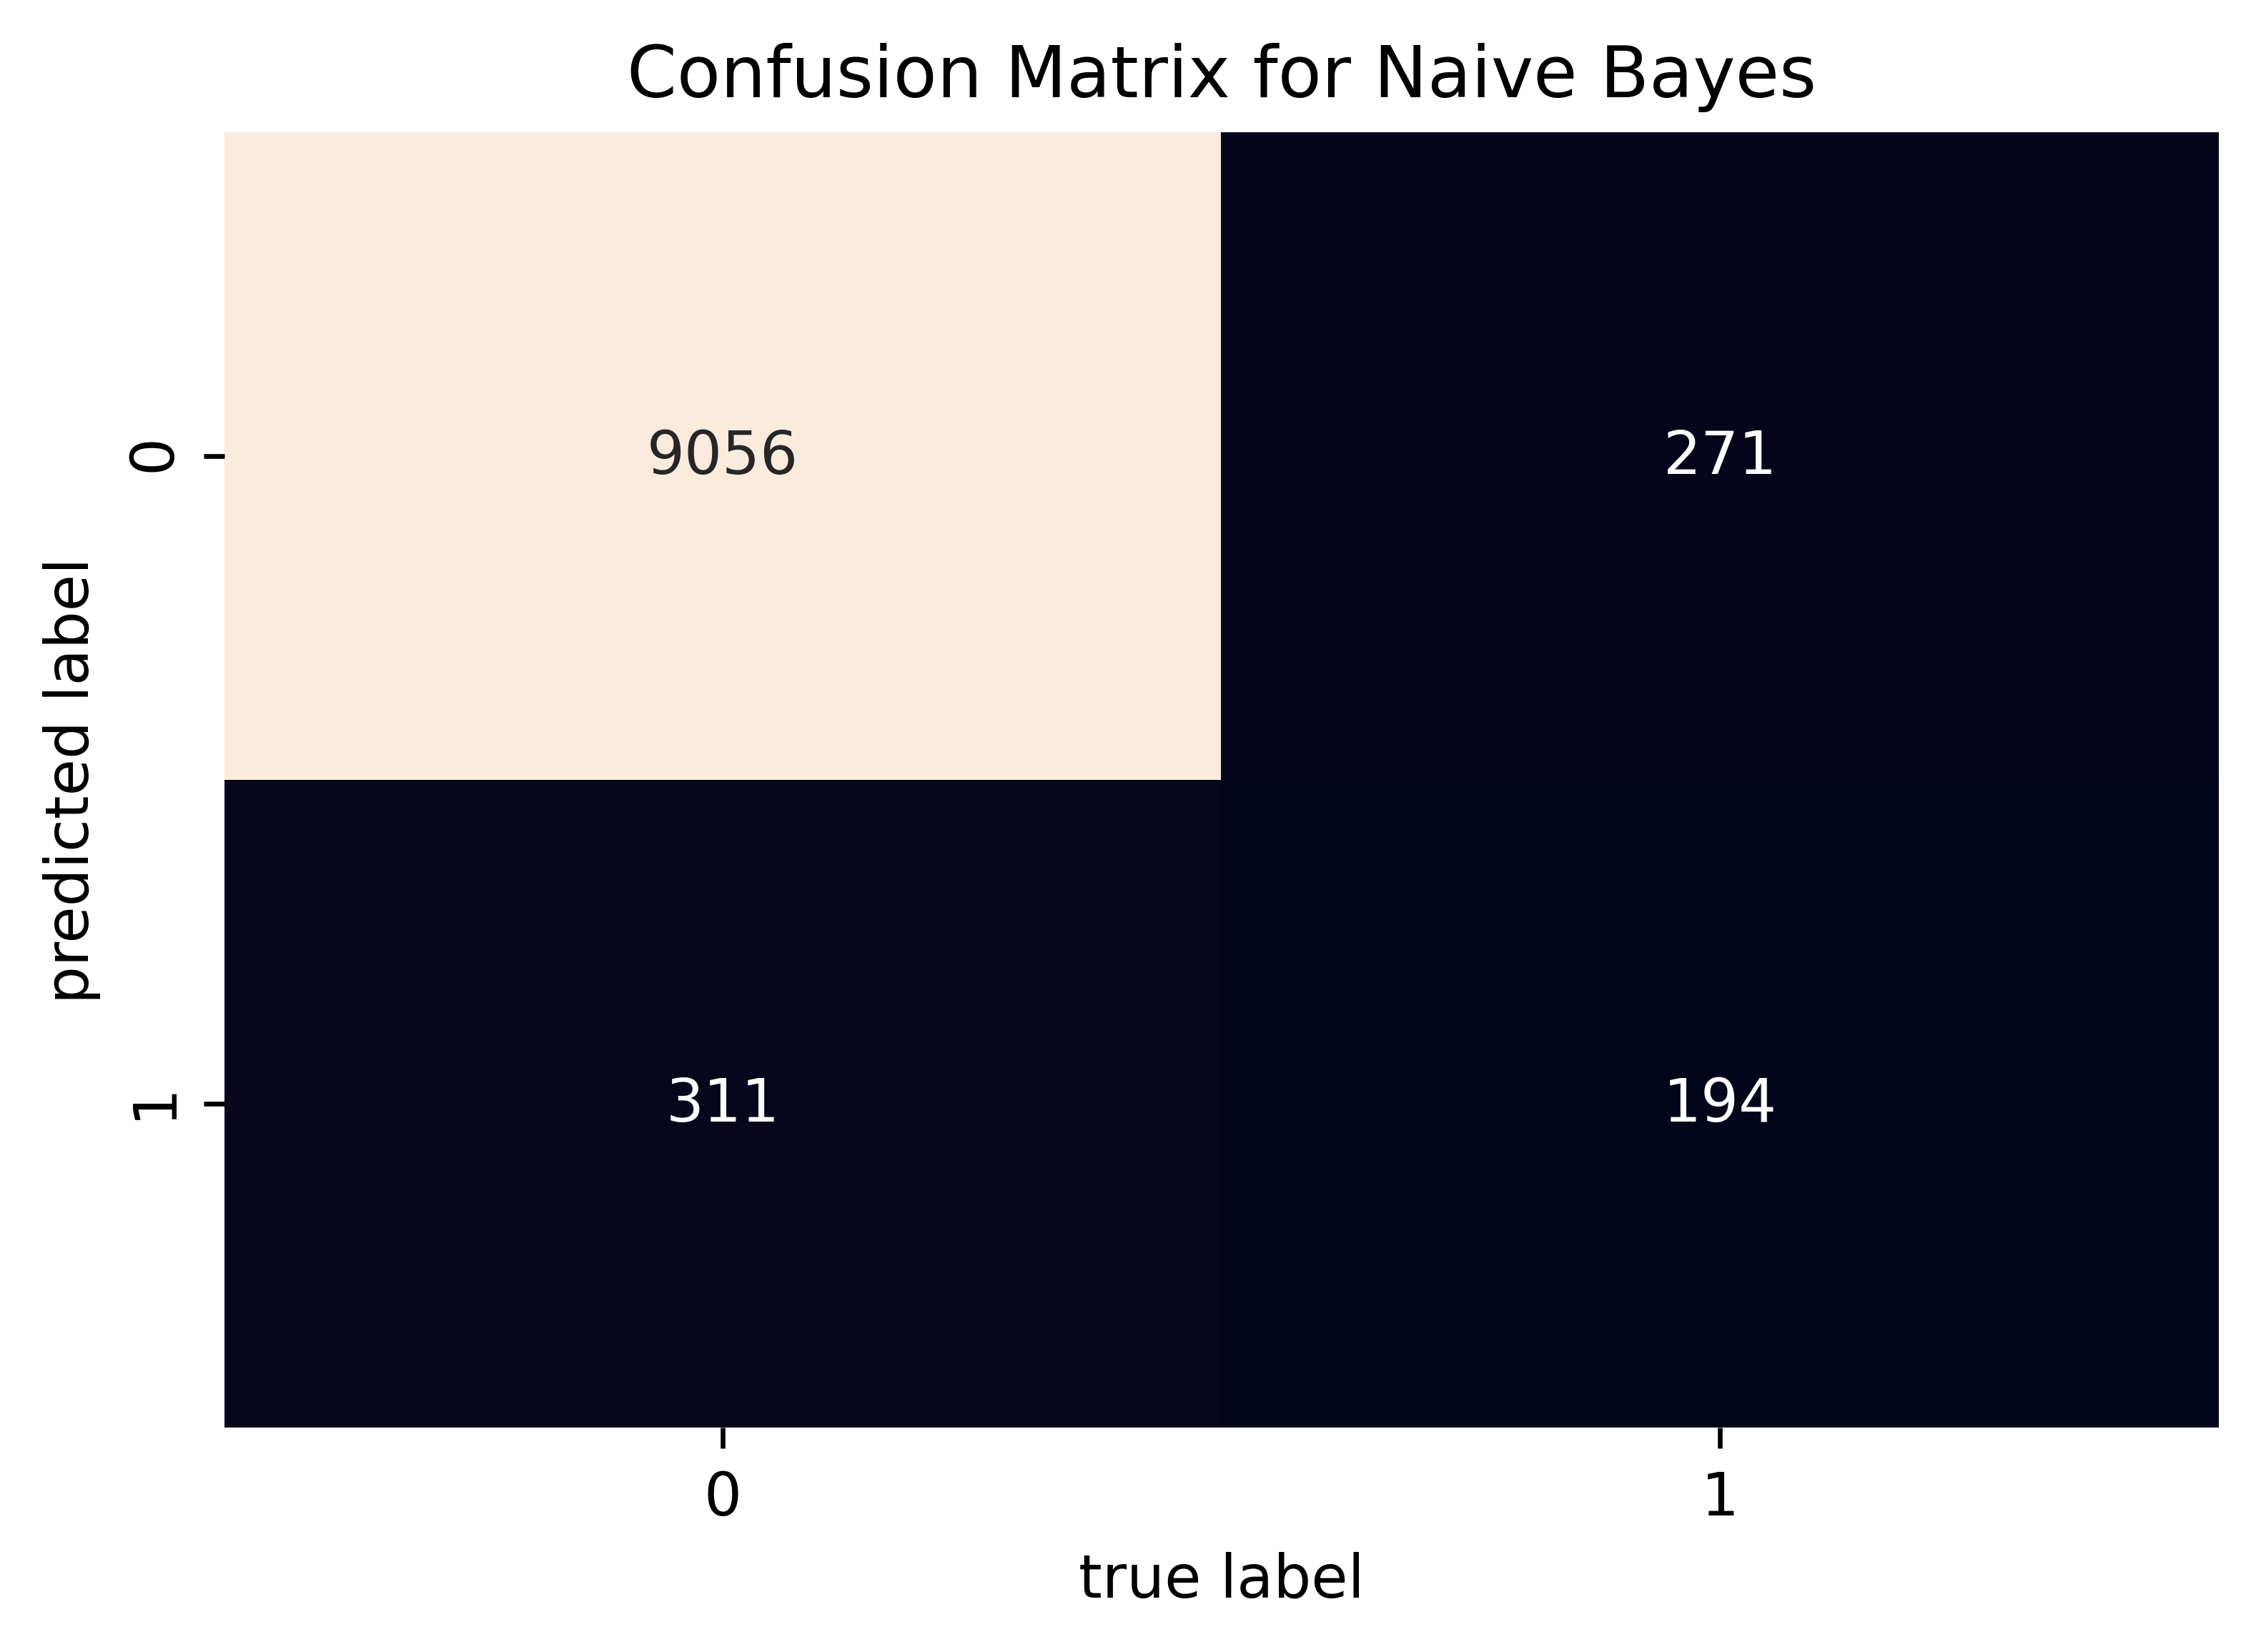

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()


here 9056 is negative tweets that can analyse from confuse matrix.

In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)


Accuracy with Naive-bayes:  0.9408055329536208


Naive-bayes model give good accuracy score its 94.

Model 2- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score , accuracy_score

For Training Dataset

In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

For Test Dataset

In [ ]:
pred =model.predict(X_test)
f1_score(y_test,pred)

0.3198757763975155

In [ ]:
accuracy_score(y_test,pred)

0.9554515866558178

From logistic regression I got 95% accuracy.

Instead of directly predicting use probability to get output

In [ ]:
pred_prob = model.predict_proba(X_test)
pred=pred_prob[:,1]>=0.3#prediction of all rows and single column
#if probability is more than 30% is 1 or else it is 0.
pred=pred.astype(np.int) #convert into the integer

f1_score(y_test,pred)

0.4025

In [ ]:
accuracy_score(y_test,pred)

0.9513832384052074

From prediction probability I got 95% accuracy.

In [ ]:
pred_prob[0][1]>=0.

False

Here its shows the result false that means it is represent tweet is positive